In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:/JOEL/important-PDFs/edwisor/Project2_BikeRental/Bike-Renting-master/day.csv')
print (df.head())
print (df.shape)

# because 'dteday' is a categorical-object, we will keep only the day-number information as object type
days = list(df['dteday'])
days = [int(d[-2:]) for d in days]
df['dteday'] = np.array(days).astype('object')
print (df['dteday'][:10])

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(731, 16)
0     1
1     2


instant :  int64
dteday :  object
season :  int64
yr :  int64
mnth :  int64
holiday :  int64
weekday :  int64
workingday :  int64
weathersit :  int64
temp :  float64
atemp :  float64
hum :  float64
windspeed :  float64
casual :  int64
registered :  int64
cnt :  int64
season :  object
yr :  object
holiday :  object
weekday :  object
workingday :  object
weathersit :  object
     varaibles  percentage
0      instant         0.0
1       dteday         0.0
2       season         0.0
3           yr         0.0
4         mnth         0.0
5      holiday         0.0
6      weekday         0.0
7   workingday         0.0
8   weathersit         0.0
9         temp         0.0
10       atemp         0.0
11         hum         0.0
12   windspeed         0.0
13      casual         0.0
14  registered         0.0
15         cnt         0.0
instant


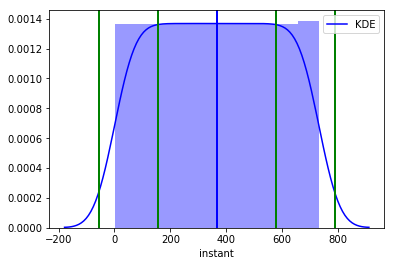




temp


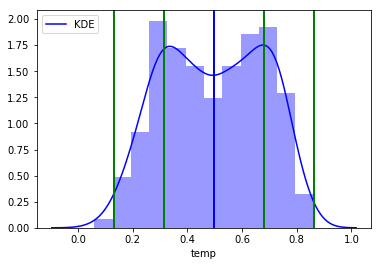




atemp


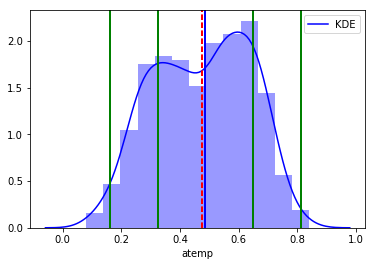




hum


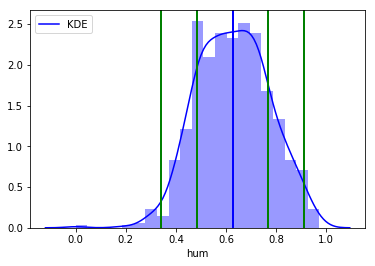




windspeed


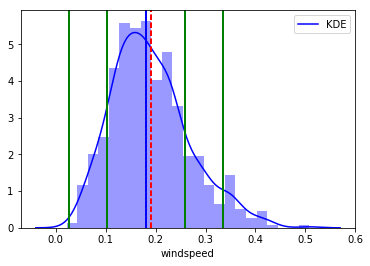




casual


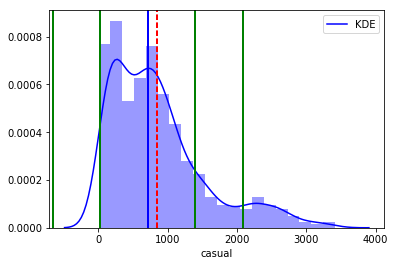




registered


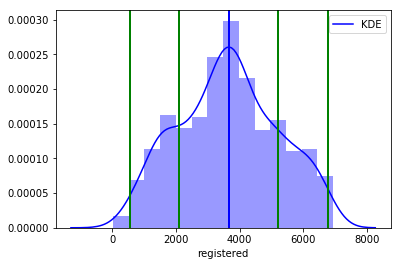




instant : 


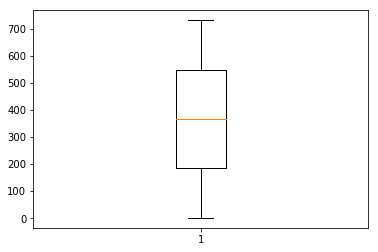




temp : 


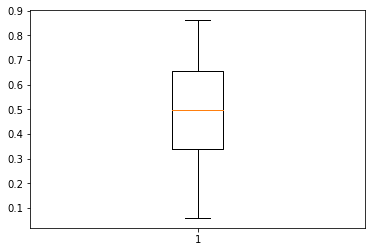




atemp : 


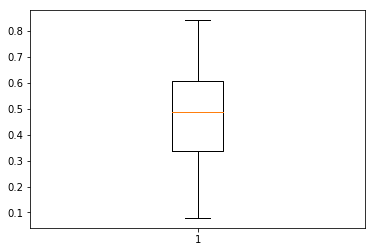




hum : 


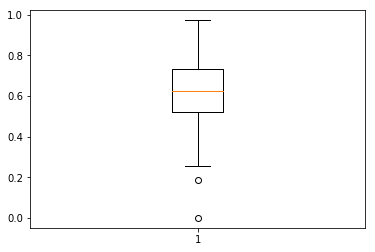




windspeed : 


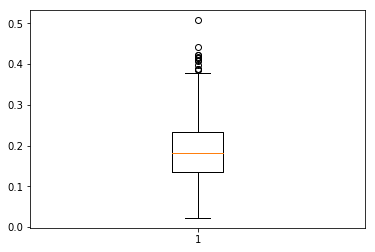




casual : 


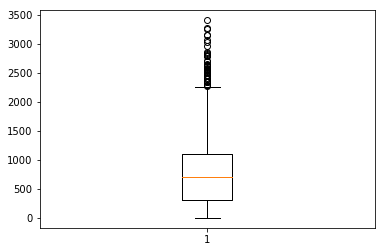




registered : 


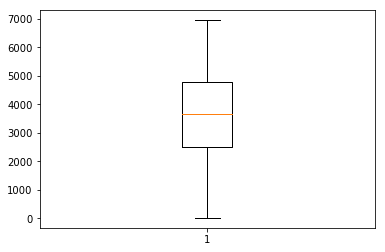




Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [5]:
# exploratory data-analysis
for col in df.columns:
    print (col,': ',df[col].dtype)
    
# when looking into the data, we understand that season,year(yr),mnth, holiday,weekday,weathersit should be categorical 
# even though Python shows them int64, these would have to be converted into object types
for col in ['season','yr','holiday','weekday','workingday','weathersit']:
    df[col] = df[col].astype('object')
    print (col,': ',df[col].dtype)
    
def missing(df):
    missing_val = pd.DataFrame(df.isnull().sum())
    missing_val = missing_val.reset_index()
    missing_val = missing_val.rename(columns={'index':'varaibles',0:'percentage'})
    missing_val['percentage'] = (missing_val['percentage']/len(df))*100
    missing_val = missing_val.sort_values('percentage',ascending=False)
    return missing_val

print (missing(df))
# so we can see there are no missing values

# lets create lists on continuous and categorical-column names
cnames = ['instant','temp','atemp','hum','windspeed','casual','registered'] # continuous
cat_names = ['dteday','season','yr','mnth','holiday','weekday','workingday','weathersit'] # categorical

# making histograms(probability-density functions) to see the distribution of data
import matplotlib.pyplot as plt
import seaborn as sns

def histograms(df):
    for col in cnames:
        print (col)
        meanVal = np.mean(df[col])
        medianVal = np.median(df[col])
        stdDev = np.std(df[col])
        posDev = medianVal + stdDev
        negDev = medianVal-stdDev
        posDev2nd = medianVal + (2*stdDev)
        negDev2nd = medianVal-(2*stdDev)
        #df[col].hist()
        sns.distplot(df[col],norm_hist=True,color='blue',kde_kws={'label':'KDE'}) # histogram with the kernel-distribution line.
        plt.axvline(meanVal, color = 'r', linestyle = 'dashed', linewidth = 2) # plotting mean line
        plt.axvline(medianVal,color='b',linewidth=2) # plotting median line
        plt.axvline(posDev, color='g', linewidth=2) # plotting positive standard-deviation line
        plt.axvline(negDev, color='g', linewidth=2) # plotting negative        "         " line
        plt.axvline(posDev2nd, color='g', linewidth=2) # plotting 2nd positive standard-deviation line
        plt.axvline(negDev2nd, color='g', linewidth=2) # plotting 2nd negative        "         " line
        plt.show()
        print ('\n\n')
    
histograms(df)    
# from the probability-density-functions, we can conclude that:
#  'instant' variable is more like an index, and it shows uniformity that's why, so we can ignore it's inferences,
#  'temp,'atemp','humidity' and 'windspeed' variables have a pretty-decent normal-distribution as shown in the graph as their-
#   mean and median line-plots are pretty close and nearly-coinciding in some cases, even the kernel-distribution line shows that
#   most of the data is within one standard-deviation both sides of the median
#   However, the 'casual' variable is skewed more towards the right inspite of majority of the data being in a normal-range.
#   Let's work on the outlier-analyis of the data.

def outlierPlot(df):
    for col in cnames:
        print (col,': ')
        plt.boxplot(df[col])
        plt.show()
        print ('\n\n')

outlierPlot(df)       
# from the outlier-analyis, we can confirm that:
# 'hum' variable has some outlier on the lower-side
# 'windspeed' variable also has considerable outliers on the upper-side
# 'casual' variable also has many outliers on the upper-side
# Let's work on the outlier-removal

#because 'instant' variable acts just like a serial number and when visualized we see that it's distribution may not contribute 
# in any way to the target variable, so we will remove it
cnames.remove('instant')
df = pd.DataFrame(data=df,columns=[c for c in df.columns if c!='instant'])
print (df.columns)





outlier-removal of:  temp
outlier-removal of:  atemp
outlier-removal of:  hum
outlier-removal of:  windspeed
outlier-removal of:  casual
outlier-removal of:  registered
     varaibles  percentage
12      casual    6.019152
11   windspeed    1.778386
10         hum    0.273598
0       dteday    0.000000
1       season    0.000000
2           yr    0.000000
3         mnth    0.000000
4      holiday    0.000000
5      weekday    0.000000
6   workingday    0.000000
7   weathersit    0.000000
8         temp    0.000000
9        atemp    0.000000
13  registered    0.000000
14         cnt    0.000000
     varaibles  percentage
0       dteday         0.0
1       season         0.0
2           yr         0.0
3         mnth         0.0
4      holiday         0.0
5      weekday         0.0
6   workingday         0.0
7   weathersit         0.0
8         temp         0.0
9        atemp         0.0
10         hum         0.0
11   windspeed         0.0
12      casual         0.0
13  registered       

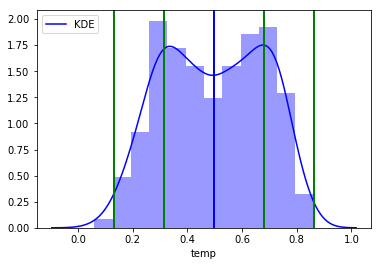




atemp


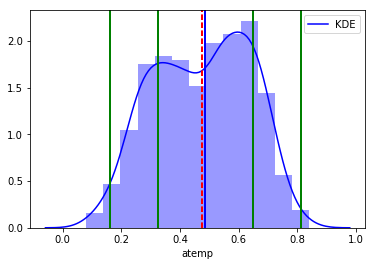




hum


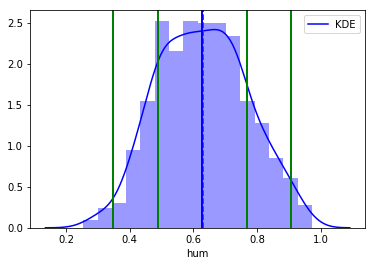




windspeed


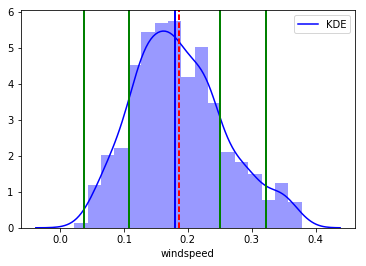




casual


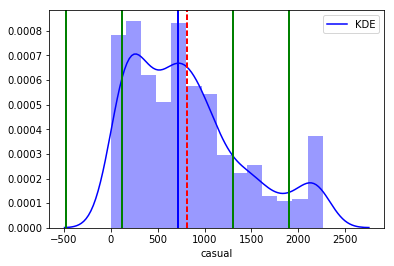




registered


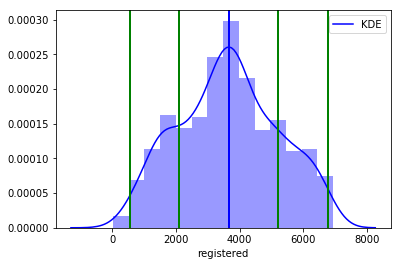




temp : 


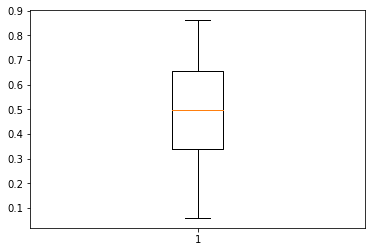




atemp : 


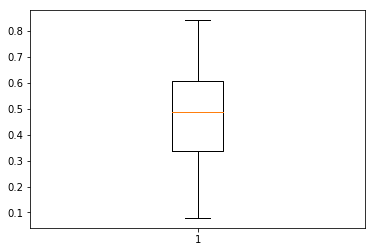




hum : 


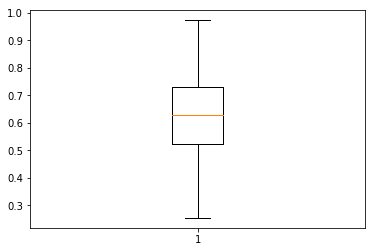




windspeed : 


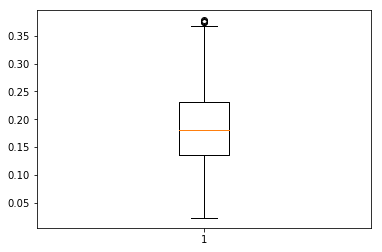




casual : 


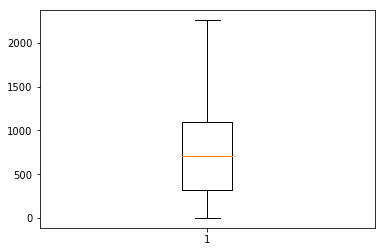




registered : 


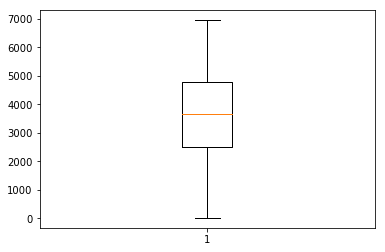

In [6]:
# Data-preprocessing

# defining function for outlier-removal (substituting with NaN values for imputation later)
def outlierRemoval(df):
    for col in cnames:
        print ('outlier-removal of: ',col)
        q75,q25 = np.percentile(df[col],[75,25])
        iqr = q75-q25
        maximum = q75 + (iqr*1.5)
        minimum = q25 - (iqr*1.5)
        df.loc[df[col] > maximum,col]= np.nan # remove outliers on the upper-side
        df.loc[df[col] < minimum,col]= np.nan # remove outliers on the lower-side
        
outlierRemoval(df)

# Let's look as the missing-value variable percentages
print (missing(df))
# after outlier-removal we can see only casual, windspeed and hum variables need imputation and no-need to drop the variables as
# missing values are below 30%

from missingpy import KNNImputer # imputer library for python 3.5.2
# Doing KNN-imputation over the dataframe
df = pd.DataFrame(KNNImputer(n_neighbors=3, weights="uniform").fit_transform(df), columns = df.columns)

# checking if any missing-values after imputation
print (missing(df))
# no-missing-values

# Let's do visualizations to see the distribution and outlier-analysis after outlier-analyis and imputations
histograms(df)
outlierPlot(df)

# saving the data 
df.to_csv(r'C:/JOEL/important-PDFs/edwisor/Project2_BikeRental/Bike-Renting-master/imputedBikeRental.csv',index=False)



                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.122347  -0.144616  0.586520    0.540012   
atemp       0.991702  1.000000  0.135958  -0.170219  0.586476    0.544192   
hum         0.122347  0.135958  1.000000  -0.204467 -0.084702   -0.114804   
windspeed  -0.144616 -0.170219 -0.204467   1.000000 -0.171780   -0.207415   
casual      0.586520  0.586476 -0.084702  -0.171780  1.000000    0.415540   
registered  0.540012  0.544192 -0.114804  -0.207415  0.415540    1.000000   
cnt         0.627494  0.631066 -0.124400  -0.220420  0.679680    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.124400  
windspeed  -0.220420  
casual      0.679680  
registered  0.945517  
cnt         1.000000  


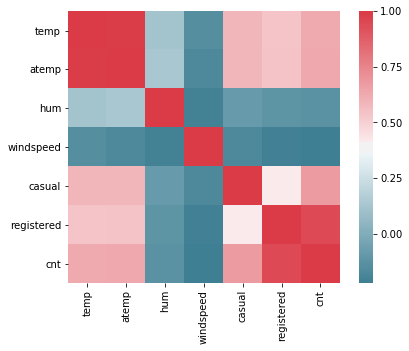

dteday  P-value:  0.0  f-statistic:  3924.44375175
There is a relationship between col:  dteday  and the target variable
season  P-value:  0.0  f-statistic:  3947.71375699
There is a relationship between col:  season  and the target variable
yr  P-value:  0.0  f-statistic:  3951.216006
There is a relationship between col:  yr  and the target variable
mnth  P-value:  0.0  f-statistic:  3940.64963675
There is a relationship between col:  mnth  and the target variable
holiday  P-value:  0.0  f-statistic:  3952.0443759
There is a relationship between col:  holiday  and the target variable
weekday  P-value:  0.0  f-statistic:  3946.83276815
There is a relationship between col:  weekday  and the target variable
workingday  P-value:  0.0  f-statistic:  3950.89441239
There is a relationship between col:  workingday  and the target variable
weathersit  P-value:  0.0  f-statistic:  3949.64633794
There is a relationship between col:  weathersit  and the target variable
Index(['dteday', 'season', 

In [7]:
# Feature selection
# Doing correlation analysis
df_corr = df.loc[:,(cnames+['cnt'])]
corr = df_corr.corr()
print (corr)
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

# correlation plot shows 'atemp' and 'temp' are highly correlated to each other

# Doing ANOVA test on all the categorical-variables
from scipy import stats
for col in cat_names:
    fStat, pVal = stats.f_oneway(df[col], df['cnt'])
    print(col,' P-value: ',pVal,' f-statistic: ',fStat)
    if pVal<0.05:
        print ('There is a relationship between col: ',col,' and the target variable')
    else:
        print ('No relationship between col: ',col,' and the target variable')
        
#  the ANOVA test shows all the categorical-variables have a relationship to the target continuous variable

# Removing the variable 'atemp' from the dataframe
df = pd.DataFrame(data=df, columns = [col for col in df.columns if col!='atemp'])
cnames.remove('atemp') # removed name from categorical-list
print (df.columns)
# from the heatmap we can see that 'registered' has a very strong linear-relationship with the target 'cnt' variable
# also 'casual' variable has a decent linear-relationship with the target, on exploring the 2 variables: casual & registered, 
# we realize that casual + registered=cnt.
# we can assume that therefore lienar-regression might play a big role in predicting the target variable accurately.

In [8]:
# feature scaling
# normalizing the continuous variables
for col in cnames:
    df[col] = (df[col]-min(df[col]))/(max(df[col]) - min(df[col]))
    
print (df.head())    
# dividing the data into train and test for applying the models over them
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2)

# metrics for checking the accuracy of our models
from sklearn.metrics import mean_squared_error,r2_score

def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape


   dteday  season   yr  mnth  holiday  weekday  workingday  weathersit  \
0     1.0     1.0  0.0   1.0      0.0      6.0         0.0         2.0   
1     2.0     1.0  0.0   1.0      0.0      0.0         0.0         2.0   
2     3.0     1.0  0.0   1.0      0.0      1.0         1.0         1.0   
3     4.0     1.0  0.0   1.0      0.0      2.0         1.0         1.0   
4     5.0     1.0  0.0   1.0      0.0      3.0         1.0         1.0   

       temp       hum  windspeed    casual  registered     cnt  
0  0.355170  0.767981   0.388102  0.145833    0.091539   985.0  
1  0.379232  0.615202   0.635752  0.057181    0.093849   801.0  
2  0.171000  0.254904   0.635105  0.052305    0.174560  1349.0  
3  0.175530  0.468123   0.387681  0.046986    0.207046  1562.0  
4  0.209120  0.254464   0.462471  0.035461    0.216286  1600.0  


C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor().fit(X_train,Y_train)
DT_preds = DT_model.predict(X_test)

print ('Random forest: ')
print ('MAPE: ',MAPE(DT_preds,Y_test))
print ('test r2 value: ',r2_score(DT_preds,Y_test))
print ('RMSE: ',np.sqrt(mean_squared_error(DT_preds,Y_test)))

Random forest: 
MAPE:  3.57673142759
test r2 value:  0.983738529199
RMSE:  224.119547181


In [11]:
from sklearn.linear_model import LinearRegression

# OLS is the method which helps to calculate the co-efficients: b0, b1, b2, b3 and so on.

LR_model = LinearRegression().fit(X_train , Y_train)
LR_preds = LR_model.predict(X_test)
print ('Linear regression: ')
print ('r2_score: ',r2_score(y_pred=LR_preds,y_true= Y_test))
print ('MAPE: ',MAPE(Y_test, LR_preds))
print ('RMSE: ',np.sqrt(mean_squared_error(LR_preds,Y_test)))


Linear regression: 
r2_score:  0.993472693213
MAPE:  1.6826366133
RMSE:  143.713445154


In [15]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor().fit(X_train,Y_train)
RF_preds = RF_model.predict(X_test)
print ('Random-forest regression: ')
print ('r2_score: ',r2_score(y_pred=RF_preds,y_true= Y_test))
print ('MAPE: ',MAPE(Y_test, RF_preds))
print ('RMSE: ',np.sqrt(mean_squared_error(RF_preds,Y_test)))

Random-forest regression: 
r2_score:  0.994458823471
MAPE:  2.54790882811
RMSE:  143.18996611


In [12]:
from sklearn.neighbors import KNeighborsRegressor
K_model = KNeighborsRegressor().fit(X_train,Y_train)
K_preds = K_model.predict(X_test)
print ('K-Neighbours regressor: ')
print ('r2_score: ',r2_score(y_pred=K_preds,y_true= Y_test))
print ('MAPE: ',MAPE(Y_test, K_preds))
print ('RMSE: ',np.sqrt(mean_squared_error(K_preds,Y_test)))

K-Neighbours regressor: 
r2_score:  0.35129975768
MAPE:  37.964758233
RMSE:  1432.69062167


In [13]:
from sklearn.svm import SVR
SVR_model = SVR(kernel='linear').fit(X_train,Y_train)
SVR_preds = SVR_model.predict(X_test)
print (r2_score(y_pred=SVR_preds,y_true= Y_test))
print (MAPE(Y_test, SVR_preds))

0.136932172951
48.9600321238
